# Inference and Representation Homework 5
## Alex Pine, 2015/09/29

I collaborated with Justin Mao-Jones, Peter Li, Maya Rotmensch, and Israel Malkin on these problems.

## Question 1

We are given the following:
$$ p(x) = \frac{1}{Z}\text{exp}\bigg[\sum_{i < j}^{n}w_{ij}x_ix_j - \sum_{i}^{n}u_ix_i\bigg], x_i \in \{0,1\} $$

Define $ y \in (-1, 1) $, so $ y = 2x - 1 $, and $ x = \frac{1}{2}(y+1) $. Then let 

$$ S = \sum_{i < j}^{n}w_{ij}x_ix_j - \sum_{i}^{n}u_ix_i $$. 

$$ S = x^T\mathbf{W}x - u^Tx $$

Where $ \mathbf{W}_{ij} = w_{ij} $ if $ (i, j) \in E, \mathbf{W}_{ij} = 0 $ otherwise.

$$ S = \frac{1}{2}(y + \mathbf{1})^T \mathbf{W} \frac{1}{2}(y + \mathbf{1}) - u^T (\frac{1}{2}(y + \mathbf{1})) $$

$$ S = \frac{1}{4}(y + \mathbf{1})^T \mathbf{W} (y + \mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}(y^T + \mathbf{1}^T) (\mathbf{W}y + \mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}(y^T\mathbf{W}y + y^T\mathbf{W}\mathbf{1} + \mathbf{1}^T\mathbf{W}y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

Since $ y^T\mathbf{W}\mathbf{1} $ is a scalar, $ y^T\mathbf{W}\mathbf{1} = (y^T\mathbf{W}\mathbf{1})^T = \mathbf{1}^T \mathbf{W}^T y $. Substituting that into our expression for $S$, we get

$$ S = \frac{1}{4}(y^T\mathbf{W}y + \mathbf{1}^T \mathbf{W}^T y + \mathbf{1}^T\mathbf{W}y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$


$$ S = \frac{1}{4}(y^T\mathbf{W}y + \mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}y^T\mathbf{W}y + \frac{1}{4}\mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) y + \frac{1}{4}\mathbf{1}^T\mathbf{W}\mathbf{1} - \frac{1}{2} u^T y - \frac{1}{2} u^T \mathbf{1} $$

$$ S = \frac{1}{4}y^T\mathbf{W}y + \frac{1}{4}(\mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) - 2u^T ) y + \frac{1}{4}\mathbf{1}^T\mathbf{W}\mathbf{1} - \frac{1}{2}u^T\mathbf{1} $$

This implies 

$$ \mathbf{W}' = \frac{1}{4}\mathbf{W} $$

$$ u' = \frac{1}{2}u - \frac{1}{4}(( \mathbf{W} + \mathbf{W}^T )\mathbf{1}) $$

$$ Z' = \frac{Z}{\text{exp}(\frac{1}{4}\mathbf{1}^T\mathbf{W}\mathbf{1} -\frac{1}{2}u^T\mathbf{1})} $$


## Question 2 pairwise Markov random field

Let $\mathbf{X}$ represent a vector of $n$ discrete random variables that can take on $s$ states each. Let the distribution of $ p(\mathbf{X}) \propto \psi(X_1, ..., X_n) $.

$ \psi $ can take on $ s^n $ different states, one for each possible value of $\mathbf{X}$. We can impose an arbitrary order on these states, which we'll call $\chi$. For example, if $n = 2$ and $s = 2$, then $\chi = [(0, 0), (1, 0), (0, 1), (1,1)]$. $\chi_2 = (1,0)$, and $\chi_{2,1} = 1$.

Then let $ Y $ be a new random variable that can take on values $1,...,s^n$. We can then make a new MRF that has $Y$ and all $X_i \in \mathbf{X}$ as nodes, and has edges between each $X_k$ and $Y$. This new pairwise MRF has the following potentials:

$$ \phi(Y = i) = \psi(\chi_i) $$
$$ \phi(Y = y, X_j = x) = 1, \text{if } y = \psi(\chi_i) \text{ and } x = \chi_{ij}, \text{ and } 0 \text{ otherwise}. $$

This new MRF factorizes as 
$$ p'(Y, \mathbf{X}) = \phi(Y)\prod_{i=1}^{n}\phi(Y, X_i) $$

Marginalizing, we have 

$$ p'(\mathbf{X} = \chi_j) = \sum_{i=1}^{n}\big[ \phi(Y = i)\prod_{k=1}^{n}\phi(Y = i, X_k = \chi_{jk}) \big] $$

In the sum, when $i = j$, then $\phi(Y = i) = \psi(\chi_i)$, and all the values of $\phi(Y = i, X_k = \chi_{jk}) = 1, k \in 1,...,n$. However, when $i \ne j $ in the sum, $\phi(Y = i, X_k = \chi_{jk}) = 0$ for at least one value of $k \in 1,...,n$, zeroing out that term in the sum. Therefore, 

$$ p'(\mathbf{X} = \chi_j) = \phi(Y = j) = \psi(\chi_j) $$.

This is equivalent to the definition of $p(\mathbf{X})$, implying that this new pairwise MRF maps to the original probability distribution once $Y$ is marginalized.

## Question 3a.1

$$ p(x \mid \mu, I) = (2\pi)^{-\frac{n}{2}} \exp\big(-\frac{1}{2}(x-\mu)^T (x-\mu) \big) $$

$$ p(x \mid \mu, I) = (2\pi)^{-\frac{n}{2}} \exp\big(-\frac{1}{2}x^Tx + x^T\mu - \frac{1}{2}\mu^T\mu \big) $$

From this, it's clear that 

$$ f(x) = (x^T, x^Tx) $$
$$ \eta = (\mu, -\frac{1}{2}) $$

and also

$$ -\log(Z(\eta)) = -\frac{1}{2}\mu^T\mu $$

$$ Z(\eta) = \exp(\frac{1}{2}\mu^T\mu) $$

$$ Z(\eta) = \exp(-\eta_2\eta_1^T\eta_1) $$

All together, the solution is:

$$ h(x) = (2\pi)^{-\frac{n}{2}} $$
$$ f(x) = (x^T, x^Tx) $$
$$ \eta = (\mu, -\frac{1}{2}) $$
$$ Z(\eta) = \exp(\frac{1}{2}\eta_1^T\eta_1) $$

## Question 3a.2

$$ \text{Dir}(x \mid \alpha) = \frac{1}{\beta(\alpha)}\prod_{i=1}^{k}x_{i}^{\alpha_{i} - 1} , \beta(\alpha) = \frac{\prod_{i=1}^{k}\Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^{k}\alpha_i)} $$

$$ \text{Dir}(x \mid \alpha) = \exp(\log(\text{Dir}(x \mid \alpha))) $$

$$ \log(\text{Dir}(x \mid \alpha)) = -\log(\beta(\alpha)) + \sum_{i=1}^{k}\log(x^{\alpha_i-1}) = -\log(\beta(\alpha)) + \sum_{i=1}^{k}(\alpha_i-1)\log(x) $$

From this it's clear that 

$$ \eta = \alpha - \mathbf{1} $$
$$ f(x) = \log(x) $$
$$ h(x) = 1 $$
$$ Z(\eta) = \beta(\eta + \mathbf{1}) $$

## Question 3a.3

Since $\mu = 0$, the pdf for the lognormal distribution is given by

$$ p(x \mid 0, \sigma) = (x\sigma\sqrt{2\pi})^{-1} \exp\big(-\frac{(\log(x))^2}{2\sigma^2}\big) $$

Note that 
$$ \frac{1}{\sigma} = \exp(\log(\sigma^{-1})) = \exp(-\log(\sigma)) $$ 

which allows us to bring it inside the exponent, giving us

$$ p(x \mid 0, \sigma) = (x\sqrt{2\pi})^{-1} \exp\big(-\frac{(\log(x))^2}{2\sigma^2} - \log(\sigma) \big) $$

Implying

$$ \eta = -\frac{1}{2\sigma^2} $$
$$ f(x) = (\log(x))^2 $$
$$ h(x) = \frac{1}{x\sqrt{2\pi}} $$
$$ Z(\eta) = \sigma $$

Using that $ \eta = -\frac{1}{2\sigma^2} $, we find

$$ Z(\eta) = \frac{1}{\sqrt{-2\eta}} $$

## Question 3a.4

The Boltzmann distribution is given by:

$$ p(x \mid u, E, W) \propto \sum_{i,j \in E}W_{i,j}x_ix_j - \sum_{i=1}^{n}u_ix_i $$

In this distribution $x$ is a vector with $n$ elements, and each $ x_i \in {0,1} $. $u$ is a vector with $n$ eliements of weights. $E$ is a vector of integer pairs representing the edges. $W$ is a upper triangular square matrix with dimensions $(n,n)$. $W_{i,j} = w_{i,j}$ if $(i,j) \in E$, and zero otherwise.

We will define a vector $w$ with $n^2$ entries, where each $w_i$ is either a weight corresponding to an edge, or zero. To create the vector $w$, flatten out the matrix $W$.

Now define $\xi$ to be a vector with the same dimensions as $w$. Each $\xi_i = x_jx_j$, where $j$ is determined by the flattening process; it is determined by a function of $i$ and the dimensions of $W$.

Then we can see that the Boltzmann distribution can be written:

$$ p(x \mid u, E, W) \propto (w, -u) \cdot (\xi, x) $$

This implies that the Boltzmann distribution is in the exponential family with the following parameters:

$$ h(x) = 1 $$

$$ \eta = (w, -u) $$ 

$$ f(x) = (\xi, x) $$

$$ Z(\eta) = 1 $$


## Question 3b

Define $a$ s.t. $ a = p(Y=1 \mid x;\alpha) = (1 + \exp(-\alpha_0 - \sum_{i=1}^{n}\alpha_{i}x_i))^{-1} $

Then $ p(Y=0 \mid  x;\alpha) = 1 - a $, and $ p(Y \mid x;\alpha) $ can be expressed as follows:

$$ p(Y \mid x;\alpha) = \exp(y \log(a) + (1-y)\log(1-a)) $$

Let $ b $ be the arguments to the exponential function, so that $ b = y\log(a) + (1-y)\log(1-a) $. Rearranging this expression, we get

$$ b = y\log(\frac{a}{1-a}) + \log(1-a) $$

If we define $ c $ s.t. $ c = \exp(-\alpha_0 - \sum_{i=1}^{n}\alpha_{i}x_i)) $, then

$$ \frac{a}{1-a} = \frac{(1+c)^{-1}}{1-(1+c)^{-1}} = \frac{1}{(1+c)-1} = c^{-1} = \exp(\alpha_0 + \sum_{i=1}^{n}\alpha_{i}x_i) $$

Plugging this into our expression for $ b $, we get

$$ b = y \log(\exp(\alpha_0 + \sum_{i=1}^{n}\alpha_{i}x_i)) + \log(1-a) = y(\alpha_0 + \sum_{i=1}^{n}\alpha_{i}x_i) + \log(1-a) $$

If we define $x' = 1,x_1,...,x_n$, then it's clear that $ f(x,y) = yx', \eta = \alpha $, and $ \log(Z(\eta,x)) = -\log(1-a) $. If we manipulate this last expression, we can find $Z(\eta,x)$.

$$ \log(Z(\eta,x)) = -\log(1-a) = \log((1-a)^{-1}) $$

$$ Z(\eta,x) = (1-a)^{-1} = (1-(1+c)^{-1})^{-1} = \frac{1}{1-(1-c)^{-1}} = \frac{1-c}{(1-c)-1} = \frac{c-1}{c} = 1-c^{-1} = 1 - \exp(\alpha_0 + \sum_{i=1}^{n}\alpha_{i}x_i)) $$

Noting that $ \alpha_0 + \sum_{i=1}^{n}\alpha_{i}x_i) = \eta^T x' $, we find

$$ Z(\eta,x) = 1 - \exp(\eta^T x') $$.

In conclusion,

$$ h(x,y) = 1 $$ 
$$ f(x,y) = yx' $$ 
$$ \eta = \alpha $$ 
$$ Z(\eta,x) = 1 - \exp(\eta^T x') $$

Where $x' = 1,x_1,...,x_n $.

# Question 4a

$ \theta \sim \text{Dir}(\alpha), X \sim \text{Cat}(\theta) $. Find $p(\theta \mid x, \alpha) $.

$$ p(\theta \mid x, \alpha) = \frac{p(X \mid \theta, \alpha) p(\theta \mid \alpha)}{p(X \mid \alpha)} $$

Since the $X$'s are observed, $ p(X \mid \alpha) $ is a constant, so we will omit it going forward.

$$ p(\theta \mid x, \alpha) \propto p(X \mid \theta, \alpha) p(\theta \mid \alpha) $$

First we'll find an expression for $ p(X \mid \theta, \alpha) $. Since each $x_i$ is categorial and i.i.d, we get 

$$ p(X \mid \theta, \alpha) = \prod_{i=1}^{n}p(x_i \mid \theta, \alpha) $$

$$ p(X \mid \theta, \alpha) = \prod_{i=1}^{n} \theta_{x_i} $$

Then if you group the $\theta_{x_i}$s that have the same category together, you get (assuming there are $k$ categories):

$$ p(X \mid \theta, \alpha) = \prod_{i=1}^{n} \prod_{j=1}^{k} \theta_{j}^{1(j = x_i)} $$

$$ p(X \mid \theta, \alpha) = \prod_{j=1}^{k} \prod_{i=1}^{n} \theta_{j}^{1(j = x_i)} $$

$$ p(X \mid \theta, \alpha) = \prod_{j=1}^{k} \theta_{j}^{\sum_{i=1}^{n}1(j = x_i)} $$

Now we will find an expression for $p(\theta \mid \alpha)$. Since $\theta \sim \text{Dir}(\alpha)$, then

$$ p(\theta \mid \alpha) = \frac{1}{\beta(\alpha)}\prod_{i=1}^{k}\theta_{i}^{\alpha_{i} - 1} $$

Since $ \frac{1}{\beta(\alpha)} $ is just a normalizing constant, I will omit it going forward and write

$$ p(\theta \mid \alpha) \propto \prod_{i=1}^{k}\theta_{i}^{\alpha_{i} - 1} $$

Putting these two expressions together, we get

$$ p(\theta \mid x, \alpha) \propto p(X \mid \theta, \alpha) p(\theta \mid \alpha) $$

$$ p(\theta \mid x, \alpha) \propto \prod_{j=1}^{k} \theta_{j}^{\sum_{i=1}^{n}1(j = x_i)} \prod_{i=1}^{k}\theta_{i}^{\alpha_{i} - 1} $$

$$ p(\theta \mid x, \alpha) \propto \prod_{j=1}^{k} \theta_{j}^{\alpha_i - 1 + \sum_{i=1}^{n}1(j = x_i)} $$

If we define $ \alpha'_i = \alpha_i + \sum_{i=1}^{n}1(j = x_i) $, then our expression becomes 

$$ p(\theta \mid x, \alpha) \propto \prod_{j=1}^{k} \theta_{j}^{\alpha'_i - 1} $$

This proves the posterier distribution for $\theta \sim \text{Dir}(\alpha')$. 

## Question 4b

Find $p(x_{n'} \mid x_n, \alpha)$.

We can find this by integrating the joint distribution with $\theta$, that is

$$ p(x_{n'} \mid x_n, \alpha) = \int p(x_{n'},\theta \mid x_n, \alpha) d\theta $$ 

Using Bayes' rule, this equals

$$ \int p(x_{n'} \mid \theta, x_n, \alpha) p(\theta \mid x_n, \alpha) d\theta $$

Since the $x$'s are independent, this equals

$$ \int p(x_{n'} \mid \theta, \alpha) p(\theta \mid x_n, \alpha) d\theta $$

Since $X \sim \text{Cat}(\theta)$, this equals

$$ \int \theta_{n'} p(\theta \mid x_n, \alpha) d\theta $$

And from the previous problem we know that $ p(\theta \mid x_n, \alpha) = \frac{1}{\beta(\alpha')}\prod_{k}^{c}\theta_{k}^{\alpha'_{k} - 1} $. Substituting this in our previous expression, we get

$$ \int \theta_{n'} \frac{1}{\beta(\alpha')}\prod_{k}^{c}\theta_{k}^{\alpha'_{k} - 1} d\theta $$

which equals

$$ \frac{1}{\beta(\alpha')} \int \prod_{k}^{c}\theta_{k}^{1(k=n') + \alpha'_{k} - 1} d\theta $$

If we define $\alpha'' = \alpha'_{k} + 1(k=n')$, then 

$$ \text{Dir}(\alpha'') = \frac{1}{\beta(\alpha'')}\prod_{k}^{c}\theta_{k}^{\alpha''_{k} - 1} $$, 

Since this is a pdf, then

$$ \int \frac{1}{\beta(\alpha'')}\prod_{k}^{c}\theta_{k}^{\alpha''_{k} - 1} = 1 $$


$$ \frac{1}{\beta(\alpha'')} \int \prod_{k}^{c}\theta_{k}^{\alpha''_{k} - 1} = 1 $$

$$ \int \prod_{k}^{c}\theta_{k}^{\alpha''_{k} - 1} = \beta(\alpha'') $$

If we substitute this into our expression for $p(x_{n'} \mid x_n, \alpha)$, we get

$$ p(x_{n'} \mid x_n, \alpha) = \frac{1}{\beta(\alpha')} \int \prod_{k}^{c}\theta_{k}^{1(k=n') + \alpha'_{k} - 1} d\theta = \frac{1}{\beta(\alpha')} \int \prod_{k}^{c}\theta_{k}^{\alpha''_{k} - 1} d\theta = \frac{\beta(\alpha'')}{\beta(\alpha')} $$

Substituting the definition of the Beta distribution, we get

$$ p(x_{n'} \mid x_n, \alpha) = \frac{\prod_{i=1}^{c}\Gamma(\alpha''_i)}{\Gamma(\sum_{i=1}^{c}\alpha''_i)}  \frac{\Gamma(\sum_{i=1}^{c}\alpha'_i)}{\prod_{i=1}^{c}\Gamma(\alpha'_i)} $$

## Question 5: Text message analysis with pymc3

Code, data summary, and graphical summary given below:

 [-----------------100%-----------------] 10000 of 10000 complete in 66.5 sec
first_switchpoint:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  32.670           4.087            0.344            [27.000, 37.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  28.000         32.000         33.000         33.000         42.000


second_switchpoint:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  60.409           3.162            0.111            [53.000, 66.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  53.000         59.000         61.000         62.000         67.000

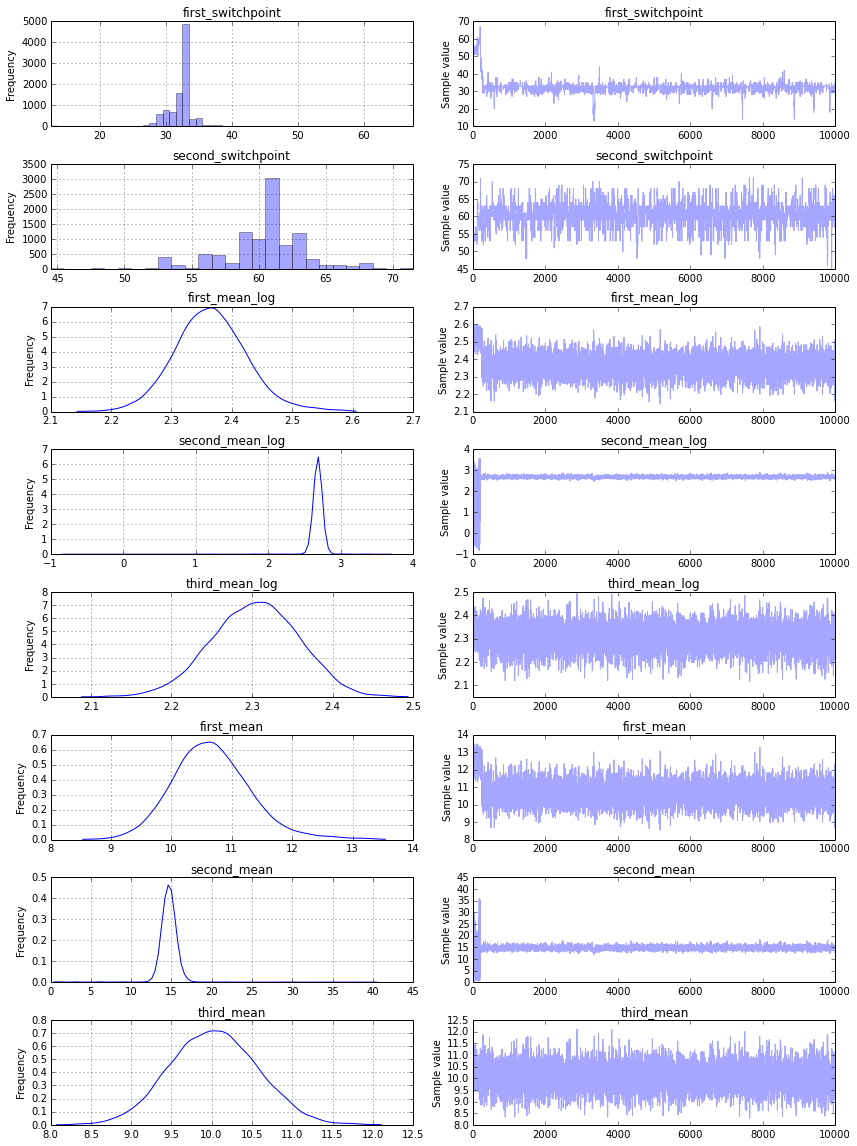

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as t

@pm.theano.compile.ops.as_op(itypes=[t.lscalar, t.lscalar, t.dscalar, t.dscalar,
                                     t.dscalar],
                             otypes=[t.dvector])
def rateFunc(first_switchpoint, second_switchpoint, first_mean, second_mean,
             third_mean):
    out = np.empty(n_count_data)
    out[:first_switchpoint] = first_mean
    out[first_switchpoint:second_switchpoint] = second_mean
    out[second_switchpoint:] = third_mean
    return out

count_data = np.loadtxt('/Users/pinesol/inference/hw2/text_data.csv')
n_count_data = len(count_data)

with pm.Model() as text_model:
    first_switchpoint = pm.DiscreteUniform('first_switchpoint', lower=0,
                                           upper=n_count_data)
    second_switchpoint = pm.DiscreteUniform('second_switchpoint',
                                            lower=0,
                                            upper=n_count_data) 
    alpha = 1.0 / count_data.mean()
    first_mean = pm.Exponential('first_mean', lam=alpha)
    second_mean = pm.Exponential('second_mean', lam=alpha)
    third_mean = pm.Exponential('third_mean', lam=alpha)

    rate = rateFunc(first_switchpoint, second_switchpoint, first_mean,
                    second_mean, third_mean)

    text_count = pm.Poisson('text_count', rate, observed=count_data)
    
    step1 = pm.Slice([first_mean, second_mean, third_mean])
    step2 = pm.Metropolis([first_switchpoint, second_switchpoint])
    trace = pm.sample(10000, step=[step1, step2])
    pm.summary(trace)
    pm.traceplot(trace)
    plt.show()

The summary statistics and their associated charts indicate that the first switch point probably occured somewhere around day 33, and the second one around day 60. The mean rate of text messages per day was around 10.67 before the first switch point, 14.67 messages per day afterwards, and then 10.03 after the second switchpoint.
